In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(8, 6)
sns.set()

Carregando dados dos usuário premium

In [27]:
df = pd.read_csv("../data/processed/premium_students.csv",parse_dates=[1,2],index_col=[0])
print(df.shape)
df.head()

(6260, 2)


,RegisteredDate,SubscriptionDate
StudentId,,
98723802,2017-11-01 00:06:09.988381,2017-11-01 01:20:11.000000
86905029,2017-11-01 00:19:31.215160,2017-11-17 21:58:57.163663
40935842,2017-11-01 00:23:43.138459,2017-11-01 01:26:17.114303
83184096,2017-11-01 00:27:33.721328,2018-05-18 14:08:42.000000
12771137,2017-11-01 00:32:57.191732,2017-11-01 00:59:44.849137


Novas colunas auxiliares

In [28]:
df['diffDate'] = (df.SubscriptionDate - df.RegisteredDate)
df['diffDays'] = [ item.days for item in df['diffDate']]
df['register_time'] = df.RegisteredDate.map(  lambda x :  int(x.strftime("%H")) )
df['register_time_AM_PM'] = df.register_time.map(  lambda x :  1 if x>=12 else 0)
df['register_num_week'] = df.RegisteredDate.map(  lambda x :  int(x.strftime("%V")) )
df['register_week_day'] = df.RegisteredDate.map(  lambda x :  int(x.weekday()) )
df['register_month'] = df.RegisteredDate.map(  lambda x :  int(x.strftime('%m')) )
df['subscription_time'] = df.SubscriptionDate.map(  lambda x :   int(x.strftime("%H") ))
df['subscription_time_AM_PM'] = df.subscription_time.map(  lambda x :  1 if x>=12 else 0)
df['subscription_num_week'] = df.SubscriptionDate.map(  lambda x :  int(x.strftime("%V")) )
df['subscription_week_day'] = df.SubscriptionDate.map(  lambda x :  int(x.weekday()) )
df['subscription_month'] = df.SubscriptionDate.map(  lambda x :  int(x.strftime('%m')) )
df.tail()

,RegisteredDate,SubscriptionDate,diffDate,diffDays,register_time,register_time_AM_PM,register_num_week,register_week_day,register_month,subscription_time,subscription_time_AM_PM,subscription_num_week,subscription_week_day,subscription_month
StudentId,,,,,,,,,,,,,,
63155484,2017-11-30 22:33:44.657210,2017-12-01 00:35:09.026934,0 days 02:01:24.369724,0,22,1,48,3,11,0,0,48,4,12
14370715,2017-11-30 22:53:40.770522,2017-12-05 20:21:35.000000,4 days 21:27:54.229478,4,22,1,48,3,11,20,1,49,1,12
23819998,2017-11-30 22:57:10.060266,2017-12-13 19:31:09.000000,12 days 20:33:58.939734,12,22,1,48,3,11,19,1,50,2,12
5600112,2017-11-30 22:58:53.948370,2017-12-01 01:08:47.538220,0 days 02:09:53.589850,0,22,1,48,3,11,1,0,48,4,12
18542457,2017-11-30 23:13:16.352160,2018-04-04 02:30:09.000000,124 days 03:16:52.647840,124,23,1,48,3,11,2,0,14,2,4


Verificando distribuições

<AxesSubplot:>

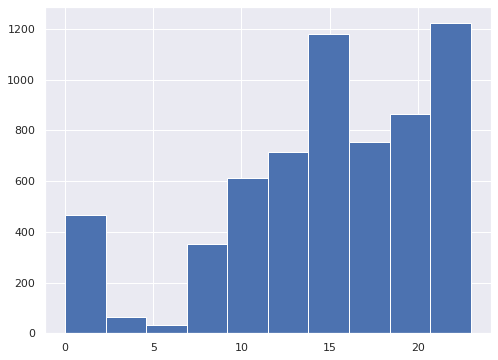

In [29]:
df.register_time.hist()

<AxesSubplot:>

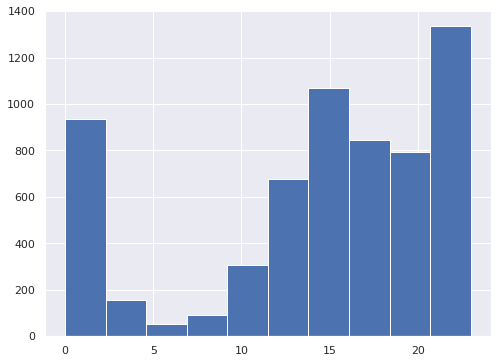

In [30]:
df.subscription_time.hist()

In [31]:
df.register_time_AM_PM.value_counts()

1    4736
0    1524
Name: register_time_AM_PM, dtype: int64

In [32]:
df.subscription_time_AM_PM.value_counts()

1    4720
0    1540
Name: subscription_time_AM_PM, dtype: int64

In [33]:
df.subscription_week_day.value_counts()

1    1137
0    1070
2     993
6     912
3     833
4     664
5     651
Name: subscription_week_day, dtype: int64

<AxesSubplot:>

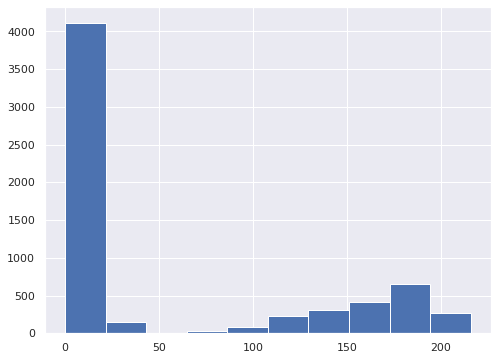

In [34]:
df.diffDays.hist()

In [35]:
df.diffDays.quantile([.25,.5,.75,.95])

0.25      0.0
0.50      1.0
0.75    137.0
0.95    193.0
Name: diffDays, dtype: float64

Separando os dados em 2 momentos.

4     80
5     77
7     68
6     62
8     53
11    44
9     44
12    41
13    40
10    39
14    32
15    28
16    24
22    19
21    17
23    16
19    16
18    14
20    12
17    11
24    11
27    11
26    10
28     9
29     9
30     9
32     9
35     8
31     7
25     7
34     4
38     4
33     4
40     3
39     3
43     3
37     3
36     2
41     2
45     2
42     1
Name: diffDays, dtype: int64

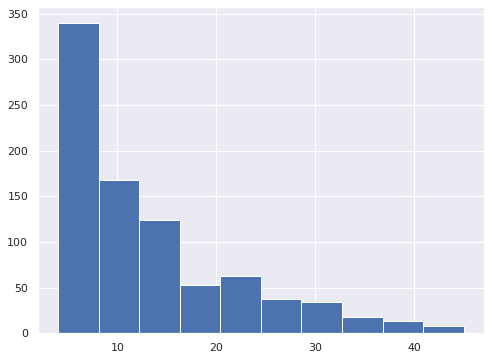

In [36]:
lt_50 = df.loc[(df.diffDays <50) & (df.diffDays >3)]
lt_50.diffDays.hist()
lt_50.diffDays.value_counts()

In [37]:
lt_50.diffDays.quantile([.25,.5,.75,.95])


0.25     6.00
0.50    11.00
0.75    17.75
0.95    32.00
Name: diffDays, dtype: float64

In [38]:
range_0_3 = df.loc[(df.diffDays < 3)]
range_3_18 = df.loc[(df.diffDays >= 3)&(df.diffDays < 18)]
range_6_11 = df.loc[(df.diffDays >= 6) & (df.diffDays < 11)]
range_11_18 = df.loc[(df.diffDays >= 11) & (df.diffDays < 18)]
range_18_32 = df.loc[(df.diffDays >= 18 )& (df.diffDays <= 32)]
range_32 = df.loc[(df.diffDays >=32)]

In [39]:
total_subs = df.shape[0]
(
round(range_0_3.shape[0] / total_subs,2),
round(range_3_18.shape[0] / total_subs,2),
round(range_18_32.shape[0] / total_subs,2),
round(range_32.shape[0] / total_subs,2)
    )

(0.53, 0.12, 0.03, 0.33)

(2035, 14)

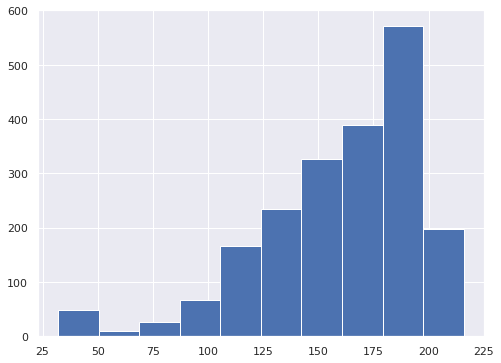

In [40]:
gte_30 = df.loc[df.diffDays >=32]
gte_30.diffDays.hist()
gte_30.diffDays.value_counts()
gte_30.shape

In [41]:
gte_30.diffDays.quantile([.25,.5,.75,.95])

0.25    140.0
0.50    168.0
0.75    188.0
0.95    203.0
Name: diffDays, dtype: float64

In [42]:
range_32_140 = df.loc[(df.diffDays > 32)&(df.diffDays <=140)]
range_140_168 = df.loc[(df.diffDays > 140)&(df.diffDays <=168)]
range_168_188 = df.loc[(df.diffDays > 168)&(df.diffDays <=188)]
range_188 = df.loc[(df.diffDays > 188)]

total_subs_gte_32 = gte_30.shape[0]
(
round(range_32_140.shape[0] / total_subs,2),
round(range_140_168.shape[0] / total_subs,2),
round(range_168_188.shape[0] / total_subs,2),
round(range_188.shape[0] / total_subs,2)
    )

(0.08, 0.08, 0.08, 0.08)

In [43]:
(
round(range_32_140.shape[0] / total_subs_gte_32,2),
round(range_140_168.shape[0] / total_subs_gte_32,2),
round(range_168_188.shape[0] / total_subs_gte_32,2),
round(range_188.shape[0] / total_subs_gte_32,2)
    )


(0.25, 0.25, 0.25, 0.24)

----
## Questão 1:
Dentre os usuários cadastrados em Nov/2017 que assinaram o Plano Premium,
qual a probabilidade do usuário virar Premium após o cadastro em ranges de dias? A escolha
dos ranges deve ser feita por você, tendo em vista os insights que podemos tirar para o
negócio.

- De 0 a 3 dias  -> 53%
- De 3 a 18 dias -> 12%
- De 18 a 32     -> 3%
- Mais 32  dias  -> 33%


Analisando as inscrições feitas depois do primeiro mês (33%)

* De 32 a 140  -> 8%
* De 140 a 168 -> 8%
* De 168 a 188 -> 8%
* De 188 a 216 -> 8%

Um pouco mais da metade das conversões acontecem nos primeiros 3 dias.
A taxa conversão chega a 65% até 18 dias após o registro.
Após 100 dias acontece outro momento relevante que representa 33%.
Possivelmente essa janela coincida com o calendário de provas das instituições.

Insights:
* Maioria das conversões no período da tarde
* Maioria das conversões no começo da semana ( anúncios aos domingos )
* Direcionar anuncios de instagram geolocalizados(instituições) nos períodos que anteceda o calendário de provas.
* Tentar converter usuários ativos depois 100 dias após o registro
* Tentar converter usuários com base no calendário de provas da instituição